# Introduction
**Part 1**

The purpose of this project is to predict the price of housing in different block groups accross California based on a set of input attributes within the dataset. Each row represents the data of an observed block group. A block group is the smallest geographical unit for which the U.S. Census Bureau publishes sample data (a block group typically has a population of 600 to 3,000 people).

https://www.kaggle.com/harrywang/housing

https://www.kaggle.com/ilialar/california-housing-analysis-and-preciction#mlcourse.ai-%E2%80%93-Open-Machine-Learning-Course
https://github.com/ageron/handson-ml/tree/master/datasets/housing

In [49]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
import statsmodels.api as sm

In [50]:
housing = pd.read_csv('data/housing.csv')

In [51]:
print(housing.shape)
housing.head(10)

(20640, 10)


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
5,-122.25,37.85,52.0,919.0,213.0,413.0,193.0,4.0368,269700.0,NEAR BAY
6,-122.25,37.84,52.0,2535.0,489.0,1094.0,514.0,3.6591,299200.0,NEAR BAY
7,-122.25,37.84,52.0,3104.0,687.0,1157.0,647.0,3.1200,241400.0,NEAR BAY
8,-122.26,37.84,42.0,2555.0,665.0,1206.0,595.0,2.0804,226700.0,NEAR BAY
9,-122.25,37.84,52.0,3549.0,707.0,1551.0,714.0,3.6912,261100.0,NEAR BAY


In [52]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [53]:
housing.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


In [54]:
housing['ocean_proximity'].value_counts()

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

In [55]:
housing.isna().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

## Columns
Columns 1 and 2 are the geographical coordinates of the housing block. Longitude specifies the East-West position of the point, Latitude specifies the North-South position of the point.

Columns 3-7 describe summarised housing block features such as median age, total rooms, population, and number of households.

Columns 8-9 show finance related attributes of the housing blocks: median income, and median house value. I am unsure what units the data is in, but I assume median income to be an hourly rate of US dollars and house value to be in US dollars. NO further information is available from the source of the data.

Column 10 describes the physical distance from the housing block to the sea/bay, but no quantiative distance data is provided. This can be quantified later on as it is commonly known that distance to the sea affects property value

In [72]:
plt.rcParams['figure.figsize']=(12, 12) 

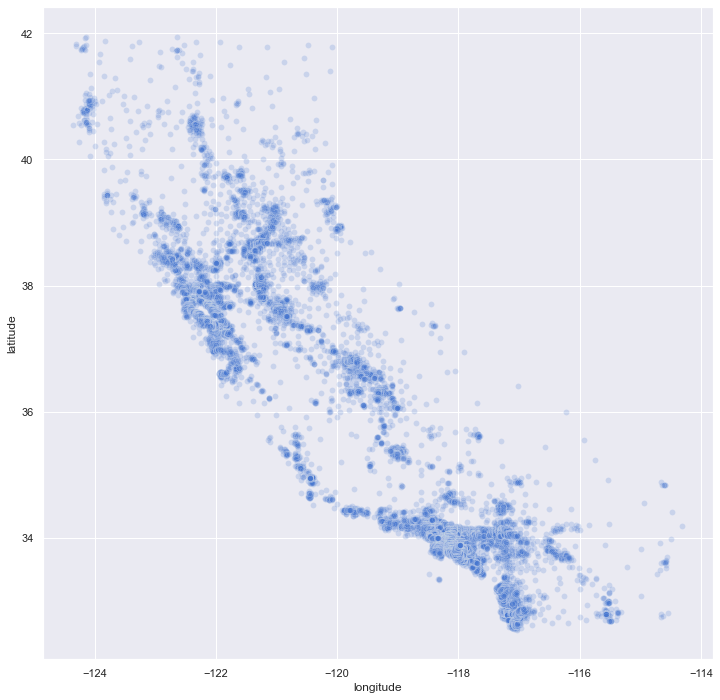

In [74]:
sns.scatterplot(data=housing, x="longitude", y="latitude",alpha=0.2, palette="bright")
plt.show()

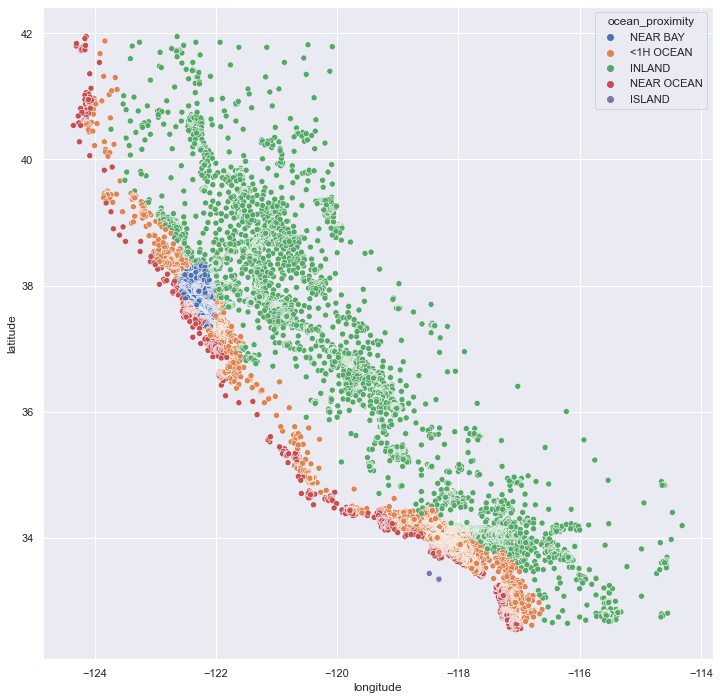

In [58]:
sns.scatterplot(data=housing, x='longitude', y='latitude', hue='ocean_proximity', legend='full')
plt.show()

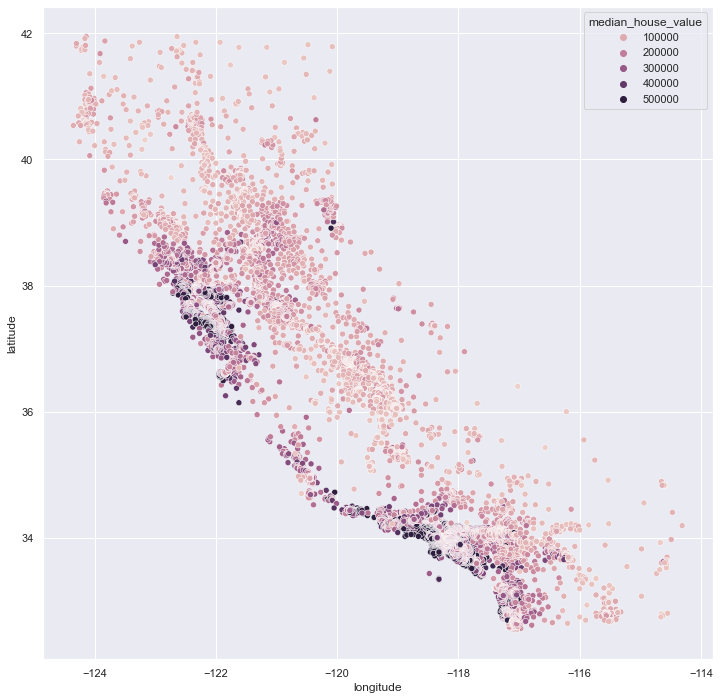

In [59]:
sns.scatterplot(data=housing, x='longitude', y='latitude', hue='median_house_value')
plt.show()

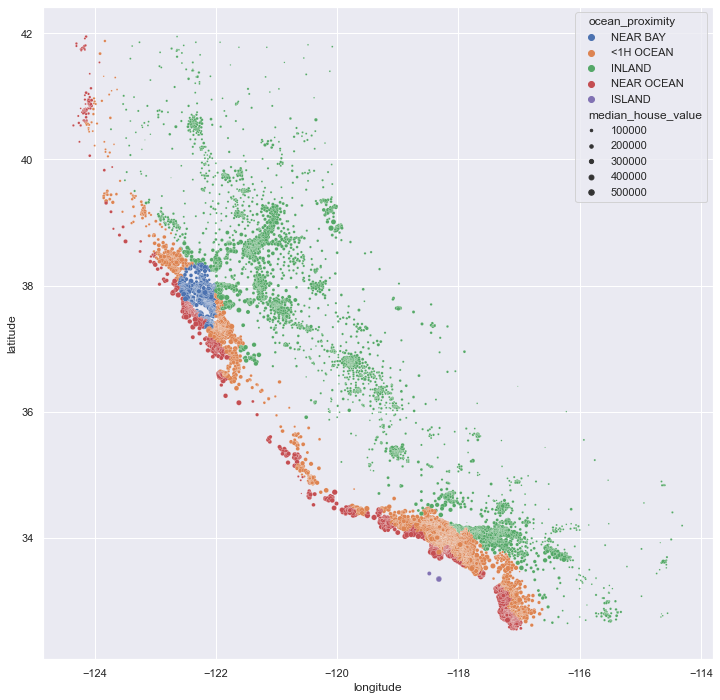

In [60]:
sns.scatterplot(data=housing, x='longitude', y='latitude', hue='ocean_proximity', size='median_house_value', sizes=(1,30))
plt.show()

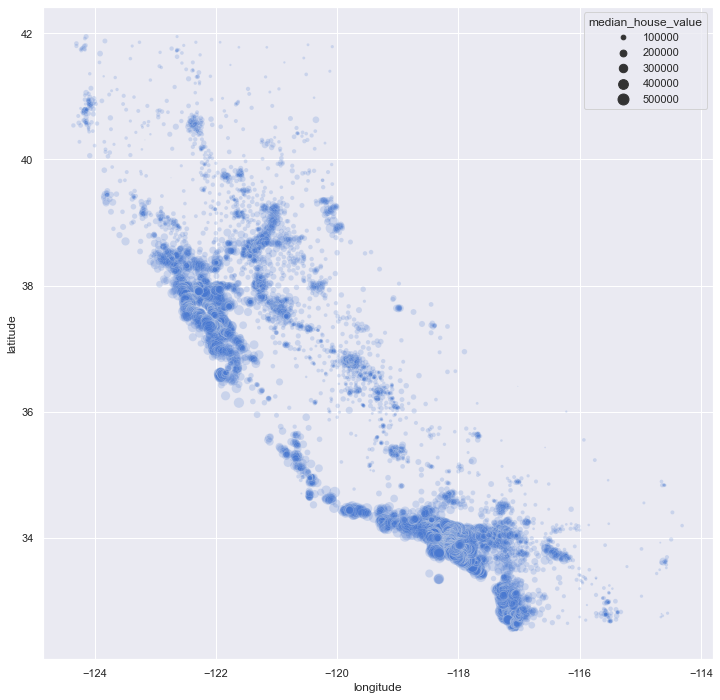

In [75]:
sns.scatterplot(data=housing, x='longitude', y='latitude', size='median_house_value', sizes=(1,120), alpha=0.2, palette="bright")
plt.show()

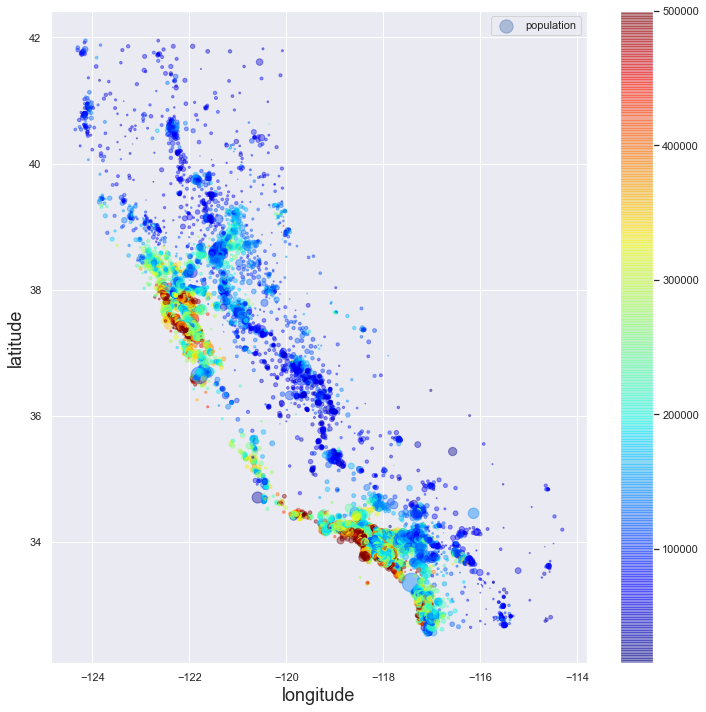

In [62]:
sp = plt.scatter(x="longitude", y="latitude", 
                 alpha=0.4, s=housing["population"]/100, label="population",
                 c="median_house_value", cmap=plt.get_cmap("jet"), 
                 data=housing)
plt.ylabel('latitude',size=18)
plt.xlabel('longitude',size=18)
plt.legend(loc='upper right')
plt.colorbar()
plt.show()

In [63]:
plt.rcParams['figure.figsize']=(10, 6)

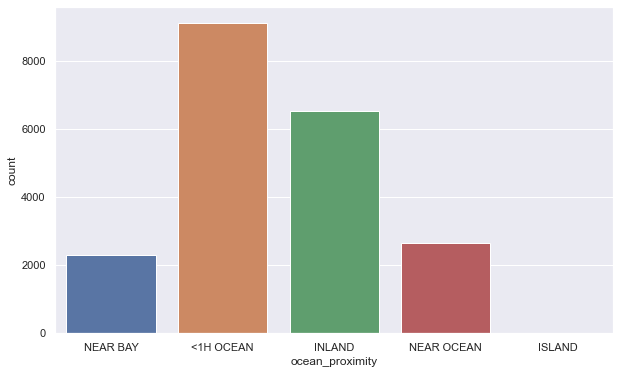

In [64]:
sns.countplot(x='ocean_proximity', data = housing)
plt.show()

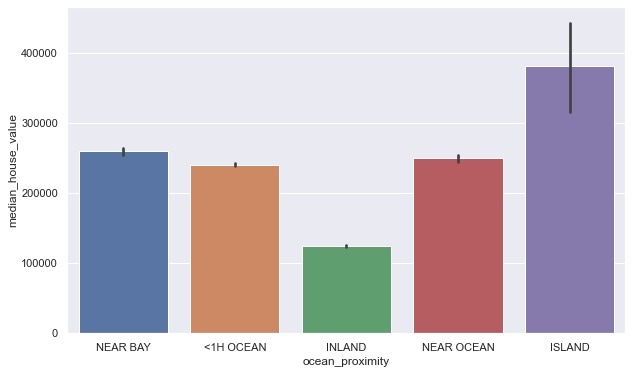

In [65]:
sns.barplot(x=housing.ocean_proximity, y=housing.median_house_value)
plt.show()

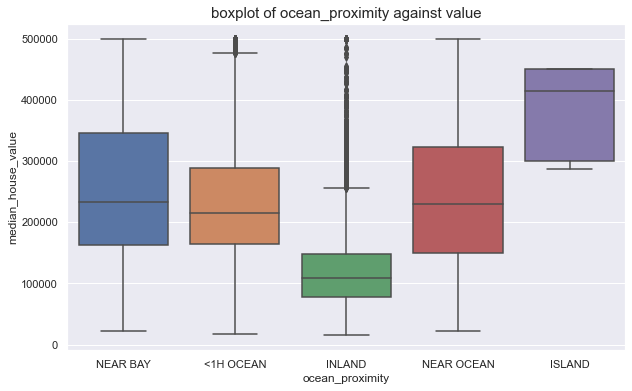

In [66]:
sns.boxplot(x=housing.ocean_proximity, y=housing.median_house_value).set_title('boxplot of ocean_proximity against value', size=15)
plt.show()

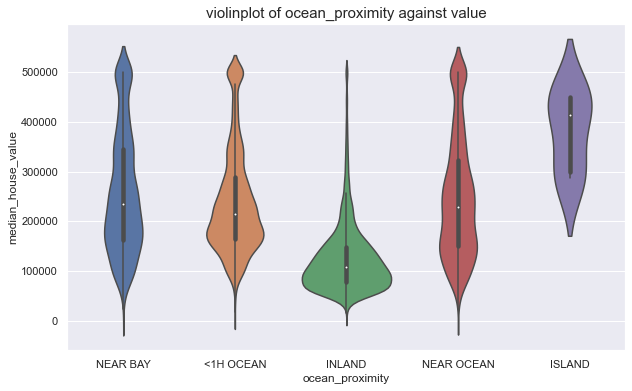

In [67]:
sns.violinplot(x=housing.ocean_proximity, y=housing.median_house_value).set_title('violinplot of ocean_proximity against value', size=15)
plt.show()

# Near Bay has the same peak as <1h ocean while near ocean does not have a significant peak, suggesting an even distribtion of house values
# Surprisingly near ocean has a lower central tendency than <1h ocean and nearbay
# Significant outliers near the top at 3 categories

In [68]:
housing['ocean_proximity'].unique()

array(['NEAR BAY', '<1H OCEAN', 'INLAND', 'NEAR OCEAN', 'ISLAND'],
      dtype=object)

NEAR BAY


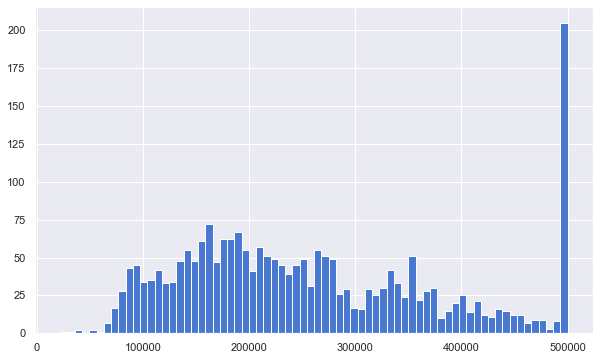

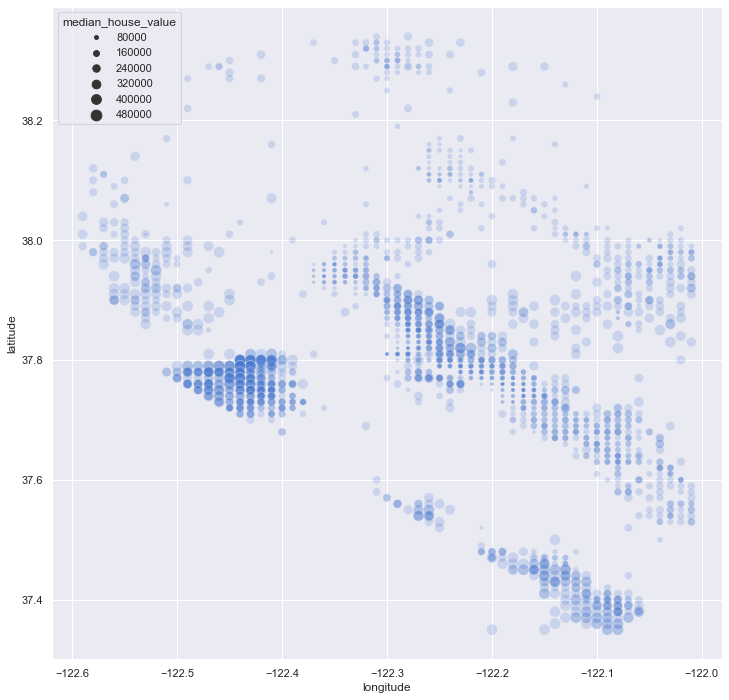




<1H OCEAN


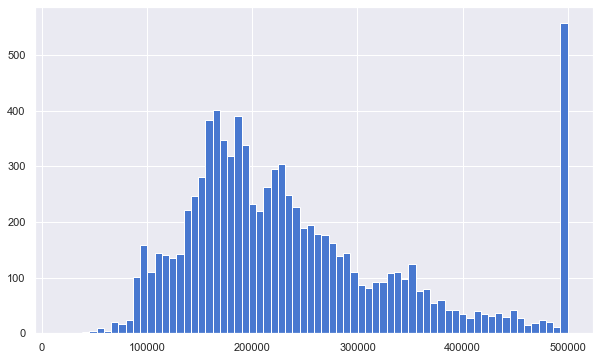

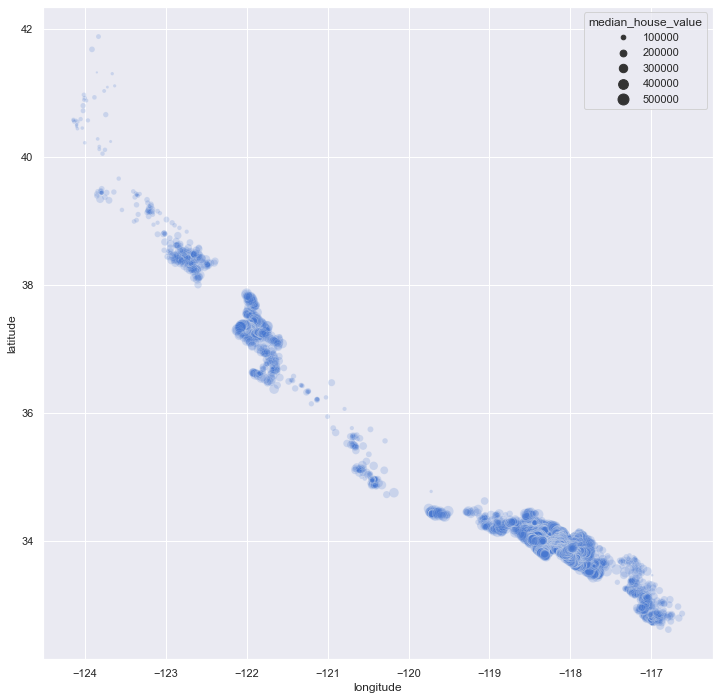




INLAND


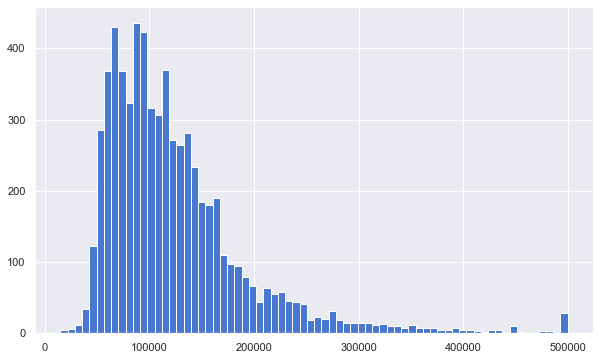

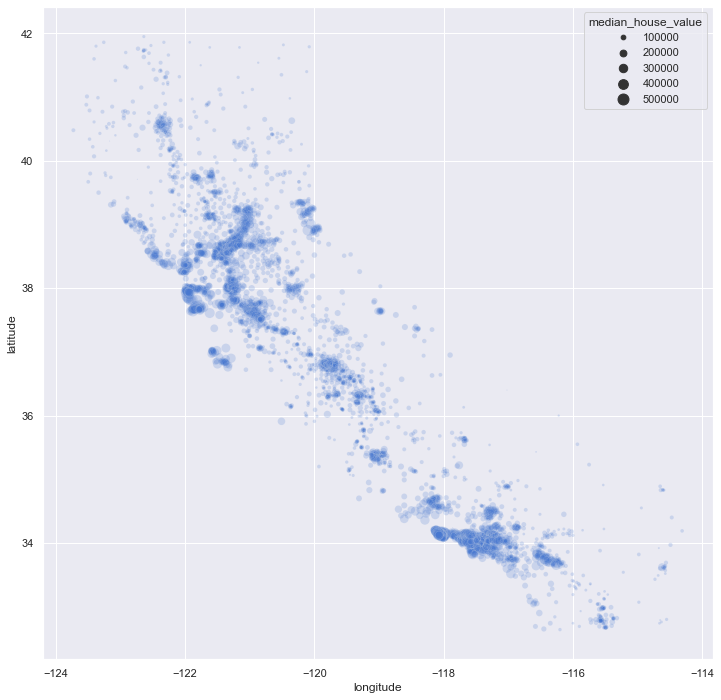




NEAR OCEAN


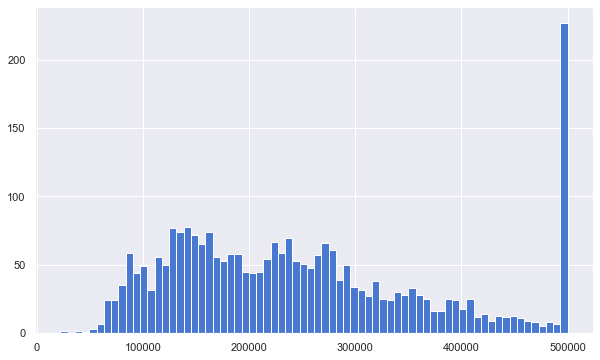

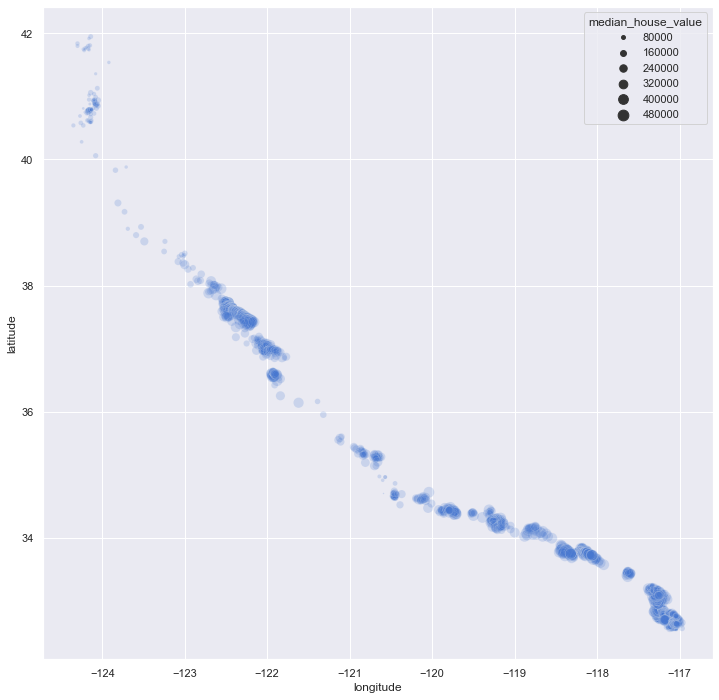




ISLAND


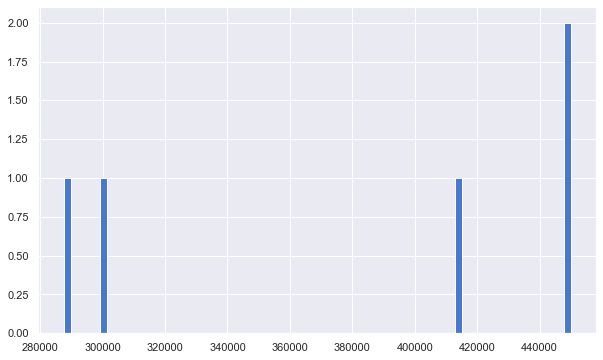

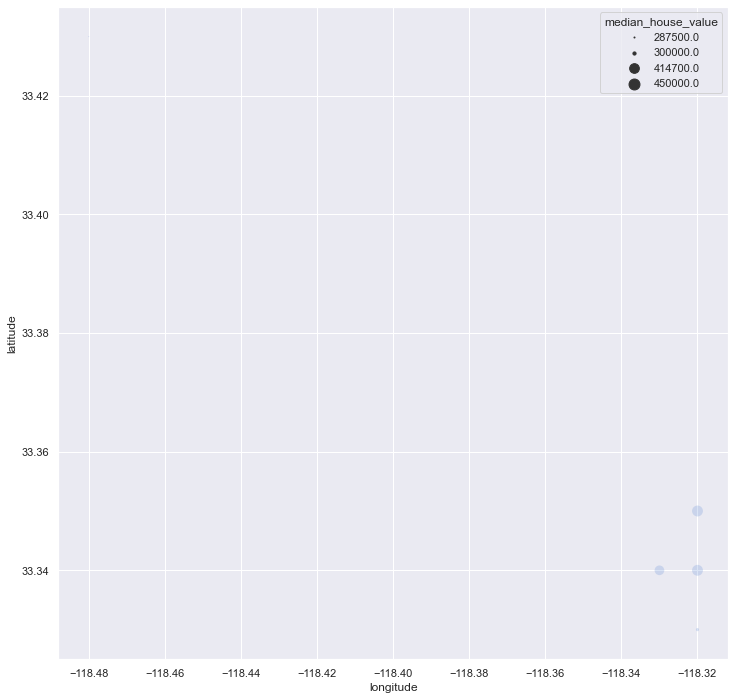

In [69]:
sns.set_theme(style="darkgrid", palette='muted')
#snsset_style("darkgrid")
for op in housing['ocean_proximity'].unique():
    print(op)
    housing[housing['ocean_proximity']==op]['median_house_value'].hist(bins=70)
    plt.show()
    plt.figure(figsize=(12,12))
    sns.scatterplot(data=housing[housing['ocean_proximity']==op], x='longitude', y='latitude'
                    , size='median_house_value', sizes=(1,120), alpha=0.2)
    plt.show()
    print('\n\n')